In [11]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

In [12]:
data=pd.read_csv('BTC-USD.csv')

In [13]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [14]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
1488,2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
1490,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444
1491,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465


In [15]:
data['Low'].describe()

count     1492.000000
mean     18277.369294
std      17309.553030
min       3191.303467
25%       6939.701782
50%       9358.137695
75%      31244.488770
max      66382.062500
Name: Low, dtype: float64

In [16]:
data['Return']= data['Adj Close'].pct_change()

In [17]:
np.mean(data['Return'])

0.0014860536040950704

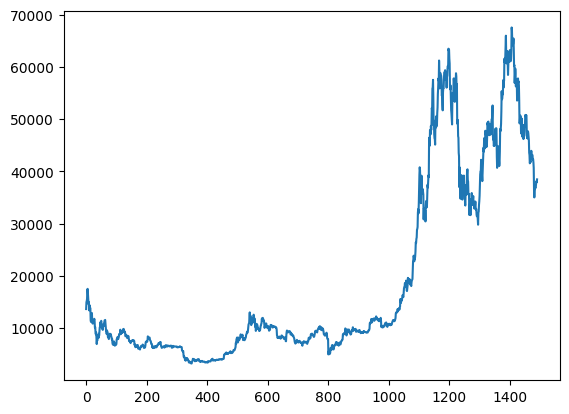

In [18]:
#plotting closing prices
ax1= data['Adj Close'].plot(style=['-'])

In [23]:
#Overall data analysis for 2018-2002
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

y_overall = data.loc[(data['Date']>= '2018-01-01') & (data['Date'] <= '2022-01-31')]

y_overall.drop(y_overall[['Adj Close', 'Volume']],axis=1)

,Date,Open,High,Low,Close,Return
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,NaN
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,0.097011
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,0.014611
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,0.026196
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,0.117333
...,...,...,...,...,...,...
1487,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,0.007764
1488,2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,0.017397
1489,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,0.009365
1490,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601563,-0.005784


In [25]:
from itertools import cycle
import plotly.express as px

names = cycle(['Stock Open Price', 'Stock Close Price', 'Stock High Price', 'Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], y_overall['High'], y_overall['Low']],
              labels={'Date': 'Date', 'value': 'Stock value'})

fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


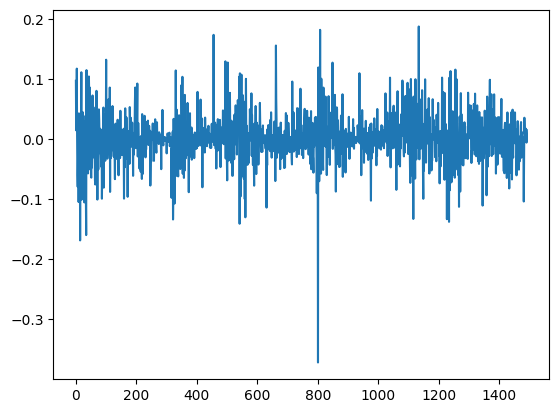

In [26]:
#plotting return prices
ax2= data['Return'].plot(style=['-'])

<Axes: >

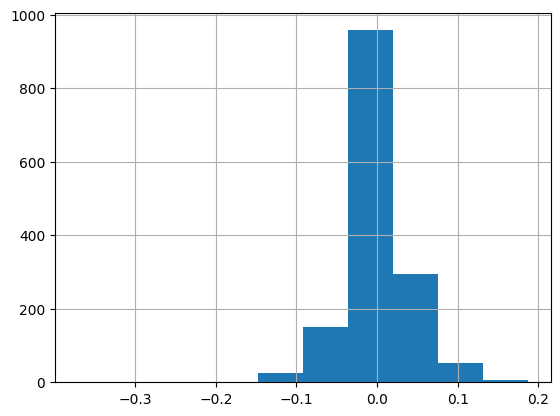

In [27]:
data['Return'].hist()

<Axes: >

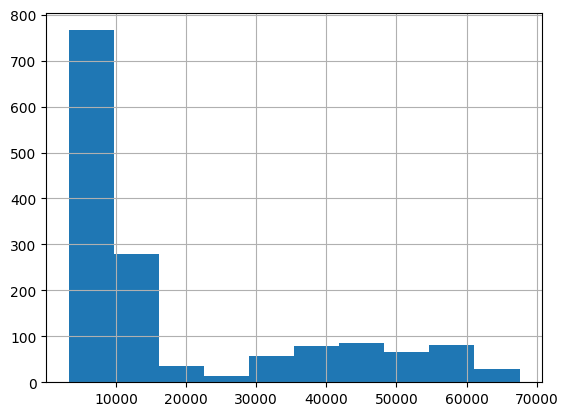

In [28]:
data['Adj Close'].hist()

<Axes: >

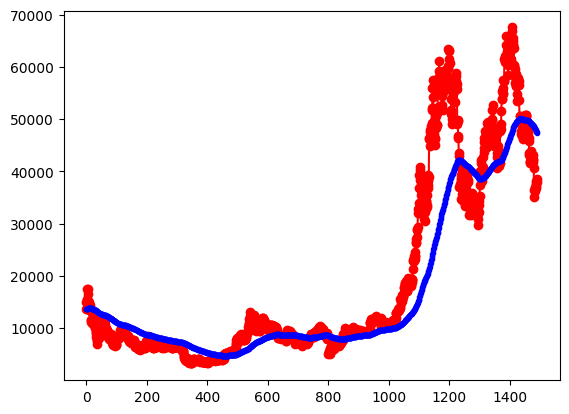

In [29]:
# Exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Assuming 'data' is your DataFrame with the 'Adj Close' column
model = SimpleExpSmoothing(data['Adj Close']).fit(smoothing_level=0.01, optimized=False)

# Plotting the data and fitted values with valid marker styles
data['Adj Close'].plot(marker='o', color='red', label='Actual Data')
model.fittedvalues.plot(marker='.', color='blue',  label='Fitted Values')



<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

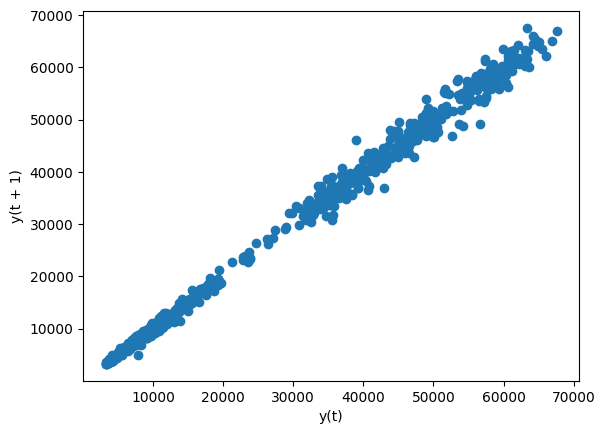

In [30]:
#log plot to check if the series is random
from pandas.plotting import lag_plot

lag_plot(data['Adj Close'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

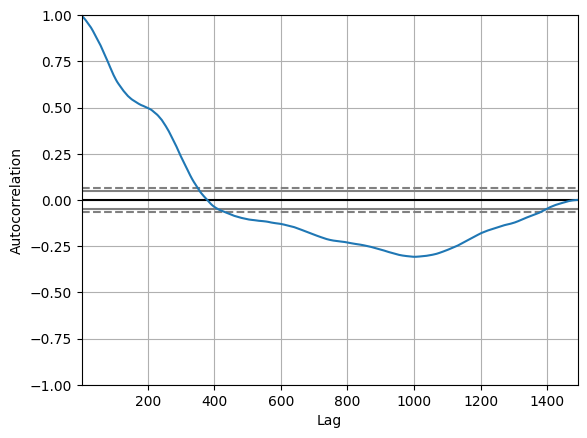

In [31]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['Adj Close'])

In [32]:
#library imports for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score 
from sklearn.preprocessing import MinMaxScaler

In [33]:
#library imports for model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.layers import LSTM

In [34]:
#library imports for plotting

import matplotlib.pyplot as plt
from itertools import cycle 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [35]:
# Check for NULL values in data
data.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

In [36]:
#drop the NULL value
data=data.dropna()
# Check for NULL values in data
data.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       0
dtype: int64

**BUILDING THE LSTM**

In [111]:
#TAKING DATA FOR PREDICTION
close_df=data[['Date','Close']]
close_df.shape

(1491, 2)

***Take 1 year data from cl_df***

In [112]:
close_df=close_df[close_df['Date']>'2020-12-31']
close_stock=close_df.copy()
close_df.shape[0]

396

In [113]:
close_df

,Date,Close
1096,2021-01-01,29374.152344
1097,2021-01-02,32127.267578
1098,2021-01-03,32782.023438
1099,2021-01-04,31971.914063
1100,2021-01-05,33992.429688
...,...,...
1487,2022-01-27,37138.234375
1488,2022-01-28,37784.332031
1489,2022-01-29,38138.179688
1490,2022-01-30,37917.601563


In [114]:
fig = px.line(close_df, x=close_df.Date, y=close_df.Close,labels={'date':'Date','close': 'close_stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout (title_text='Considered period to predict Bitcoin close price',
  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes (showgrid=False)
fig.update_yaxes (showgrid=False) 
fig.show()

**Normalizing the data**


In [115]:
#deleting the dates for normalization

del close_df['Date']



In [116]:
scaler= MinMaxScaler(feature_range=(0,1))
close_df=scaler.fit_transform(np.array(close_df).reshape(-1,1))


In [117]:
close_df.shape

(396, 1)

**SLICING INTO TRAINING AND TESTING SET**


In [118]:
training_size=int(len(close_df)*0.60)
test_size=len(close_df)-training_size
train_data , test_data = close_df[0:training_size], close_df[training_size:len(close_df),:1]
train_data.shape

(237, 1)

**TRANSFORM THE CLOSING PRICE BASED ON TIME SERIES FORECASTING. TIME_STEP= 15**


In [119]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
   dataX,dataY = [] , []
   for i in range(len(dataset)-time_step-1):
      a=dataset[i:(i+time_step),0]
      dataX.append(a)
      dataY.append(dataset[i + time_step,0])
   return np.array(dataX),np.array(dataY)   

In [125]:
time_step=15
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test   = create_dataset(test_data,time_step)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(221, 15)
(221,)
(143, 15)
(143,)


In [128]:
#reshape the input to be [samples,time_step,features] that is required by the LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)
print(X_test.shape)


(221, 15, 1)
(143, 15, 1)


****BUILD THE MODEL****


In [132]:
model=Sequential()
model.add(LSTM(10,input_shape=(None,1),activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_sqaured_error",optimizer="adam")
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 [==============================] - 3s 95ms/step - loss: 0.3024 - val_loss: 0.4589
Epoch 2/200
7/7 [==============================] - 0s 20ms/step - loss: 0.2684 - val_loss: 0.4157
Epoch 3/200
7/7 [==============================] - 0s 32ms/step - loss: 0.2430 - val_loss: 0.3789
Epoch 4/200
7/7 [==============================] - 0s 19ms/step - loss: 0.2199 - val_loss: 0.3459
Epoch 5/200
7/7 [==============================] - 0s 16ms/step - loss: 0.1992 - val_loss: 0.3084
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 0.1726 - val_loss: 0.2669
Epoch 7/200
7/7 [==============================] - 0s 17ms/step - loss: 0.1469 - val_loss: 0.2247
Epoch 8/200
7/7 [==============================] - 0s 21ms/step - loss: 0.1226 - val_loss: 0.1797
Epoch 9/200
7/7 [==============================] - 0s 20ms/step - loss: 0.0974 - val_loss: 0.1325
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0701 - val_loss: 0.0748
Epoch 11/200
7/7 [=